In [1]:
import statsmodels.formula.api as smf
from pathlib import Path
import pandas as pd

In [2]:
csv_dir = Path("../csvs")
plot_summaries = pd.read_csv(csv_dir / "plot_summary_metrics.csv")
plot_summaries['site'] = plot_summaries['id'].str[0:-3]
plot_summaries = plot_summaries.set_index('id')
plot_summaries = plot_summaries.drop(columns=['mean__point_density', 'mean__pulse_density', 'mean__scan_angle_mean'])

site_info = pd.read_csv(csv_dir / "site_info.csv")
site_info = site_info.set_index('site_id')
site_info = site_info.drop(columns=['Unnamed: 0'])
site_info['year_estab'] = site_info['year_estab'].fillna(1950)
site_info['years_since_dist'] = 2025 - site_info['year_estab']
site_info = site_info[['site_type', 'year_estab', 'years_since_dist', 'elev_mean', 'slope_mean']]
site_info['system_type'] = site_info['site_type'].str[0]

# Join site_info onto plot_summaries using the site column
plot_summaries_with_site_info = plot_summaries.reset_index().merge(site_info.reset_index(), left_on='site', right_on='site_id', how='left')
# Rename the index columns to be more descriptive
plot_summaries_with_site_info = plot_summaries_with_site_info.rename(columns={'id': 'plot_id'})
plot_summaries_with_site_info

,plot_id,mean__chm,mean__veg_height_mean,mean__veg_height_median,mean__crr,mean__veg_height_q10,mean__veg_height_q20,mean__veg_height_q30,mean__veg_height_q40,mean__veg_height_q50,...,mean__upperstorey_capture,sd__upperstorey_capture,site,site_id,site_type,year_estab,years_since_dist,elev_mean,slope_mean,system_type
0,AGG_O_01_P1,9.104318,5.137496,5.942358,0.555466,0.827366,2.094856,3.608292,4.965329,5.942358,...,0.480691,0.215257,AGG_O_01,AGG_O_01,AGG,2011.0,14.0,499.878173,8.674255,A
1,AGG_O_01_P2,9.143720,5.406901,6.223384,0.587945,1.139656,2.580198,4.114914,5.355371,6.223384,...,0.490357,0.223808,AGG_O_01,AGG_O_01,AGG,2011.0,14.0,499.878173,8.674255,A
2,AGG_O_01_P3,10.808279,6.217011,7.103875,0.566187,1.219969,2.737667,4.482414,5.977429,7.103875,...,0.530290,0.196480,AGG_O_01,AGG_O_01,AGG,2011.0,14.0,499.878173,8.674255,A
3,AGG_O_01_P4,26.233368,13.597761,14.183244,0.515107,2.973598,5.638570,8.552811,11.551565,14.183244,...,0.161525,0.255513,AGG_O_01,AGG_O_01,AGG,2011.0,14.0,499.878173,8.674255,A
4,AGG_O_01_P5,33.688303,18.889891,19.677525,0.559599,6.047861,9.974202,13.305916,16.630211,19.677525,...,0.200391,0.277582,AGG_O_01,AGG_O_01,AGG,2011.0,14.0,499.878173,8.674255,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,ULY_Y_96_P1,8.352560,4.404127,4.335475,0.509003,1.691274,2.384248,3.008736,3.701808,4.335475,...,0.010009,0.055076,ULY_Y_96,ULY_Y_96,ULY,2018.0,7.0,406.429871,3.238499,U
311,ULY_Y_96_P2,6.701582,3.035757,2.953558,0.460762,0.612857,1.049896,1.630950,2.234692,2.953558,...,0.035624,0.123886,ULY_Y_96,ULY_Y_96,ULY,2018.0,7.0,406.429871,3.238499,U
312,ULY_Y_96_P3,4.673009,1.822269,1.539182,0.441329,0.488729,0.675738,0.897068,1.172479,1.539182,...,0.006595,0.046898,ULY_Y_96,ULY_Y_96,ULY,2018.0,7.0,406.429871,3.238499,U
313,ULY_Y_96_P4,3.392897,1.281298,1.031894,0.452561,0.337284,0.463087,0.622418,0.806183,1.031894,...,0.001540,0.018385,ULY_Y_96,ULY_Y_96,ULY,2018.0,7.0,406.429871,3.238499,U


In [3]:
df = plot_summaries_with_site_info.copy()

# Drop rows where system_type = 'A'
df = df[df['system_type'] != 'A']

# Make system and site type  categorical
df['site_type'] = pd.Categorical(df['site_type'])
df['system_type'] = pd.Categorical(df['system_type'])

# Center years since disturbance ? Could just use year then
df['year_estab'] = df['year_estab'] - df['year_estab'].mean()
df['years_since_dist'] = df['years_since_dist'] - df['years_since_dist'].mean()
df['elev_mean'] = df['elev_mean'] - df['elev_mean'].mean()
df['slope_mean'] = df['slope_mean'] - df['slope_mean'].mean()

df

,plot_id,mean__chm,mean__veg_height_mean,mean__veg_height_median,mean__crr,mean__veg_height_q10,mean__veg_height_q20,mean__veg_height_q30,mean__veg_height_q40,mean__veg_height_q50,...,mean__upperstorey_capture,sd__upperstorey_capture,site,site_id,site_type,year_estab,years_since_dist,elev_mean,slope_mean,system_type
28,EPO_O_04_P1,35.256417,19.296344,20.624380,0.564693,5.548735,7.355412,10.369849,15.542192,20.624380,...,0.371837,0.251230,EPO_O_04,EPO_O_04,EPO,-2.368421,2.368421,-94.572399,-2.291486,E
29,EPO_O_04_P2,37.862545,20.520089,21.788821,0.558108,6.071011,7.975995,11.142181,16.460401,21.788821,...,0.373815,0.252206,EPO_O_04,EPO_O_04,EPO,-2.368421,2.368421,-94.572399,-2.291486,E
30,EPO_O_04_P4,38.875430,21.506406,22.659408,0.569585,6.366738,8.853556,12.559268,17.622100,22.659408,...,0.381918,0.263688,EPO_O_04,EPO_O_04,EPO,-2.368421,2.368421,-94.572399,-2.291486,E
31,EPO_O_04_P5,39.223543,21.660517,22.431270,0.567671,6.984291,9.440244,13.129633,17.822238,22.431270,...,0.393512,0.263497,EPO_O_04,EPO_O_04,EPO,-2.368421,2.368421,-94.572399,-2.291486,E
32,EPO_O_04_P3,39.981493,21.708241,22.930691,0.558417,6.343405,8.865948,12.526952,17.908626,22.930691,...,0.376884,0.255628,EPO_O_04,EPO_O_04,EPO,-2.368421,2.368421,-94.572399,-2.291486,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,ULY_Y_96_P1,8.352560,4.404127,4.335475,0.509003,1.691274,2.384248,3.008736,3.701808,4.335475,...,0.010009,0.055076,ULY_Y_96,ULY_Y_96,ULY,24.631579,-24.631579,-16.318390,-5.995877,U
311,ULY_Y_96_P2,6.701582,3.035757,2.953558,0.460762,0.612857,1.049896,1.630950,2.234692,2.953558,...,0.035624,0.123886,ULY_Y_96,ULY_Y_96,ULY,24.631579,-24.631579,-16.318390,-5.995877,U
312,ULY_Y_96_P3,4.673009,1.822269,1.539182,0.441329,0.488729,0.675738,0.897068,1.172479,1.539182,...,0.006595,0.046898,ULY_Y_96,ULY_Y_96,ULY,24.631579,-24.631579,-16.318390,-5.995877,U
313,ULY_Y_96_P4,3.392897,1.281298,1.031894,0.452561,0.337284,0.463087,0.622418,0.806183,1.031894,...,0.001540,0.018385,ULY_Y_96,ULY_Y_96,ULY,24.631579,-24.631579,-16.318390,-5.995877,U


In [4]:
model = smf.mixedlm("mean__chm ~ system_type + years_since_dist", df, groups=df["site_id"])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:               MixedLM  Dependent Variable:  mean__chm
No. Observations:    285      Method:              REML     
No. Groups:          57       Scale:               5.7258   
Min. group size:     5        Log-Likelihood:      -755.8599
Max. group size:     5        Converged:           Yes      
Mean group size:     5.0                                    
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        23.107    2.240 10.315 0.000  18.716 27.497
system_type[T.N] -5.945    2.831 -2.100 0.036 -11.494 -0.396
system_type[T.P] -4.254    2.988 -1.424 0.154 -10.111  1.602
system_type[T.U] -4.322    3.464 -1.248 0.212 -11.111  2.466
years_since_dist  0.307    0.050  6.193 0.000   0.210  0.404
Group Var        52.379    4.861                            
============================================================

"""

In [6]:
result.resid

28    -2.675259
29    -0.069131
30     0.943753
31     1.291866
32     2.049817
         ...   
310    2.683569
311    1.032590
312   -0.995982
313   -2.276095
314   -1.050463
Length: 285, dtype: float64

/var/folders/37/j4yld2bd7pz4_0p7b249nvv40000gn/T/ipykernel_52086/706557759.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(residual_groups, labels=system_labels)


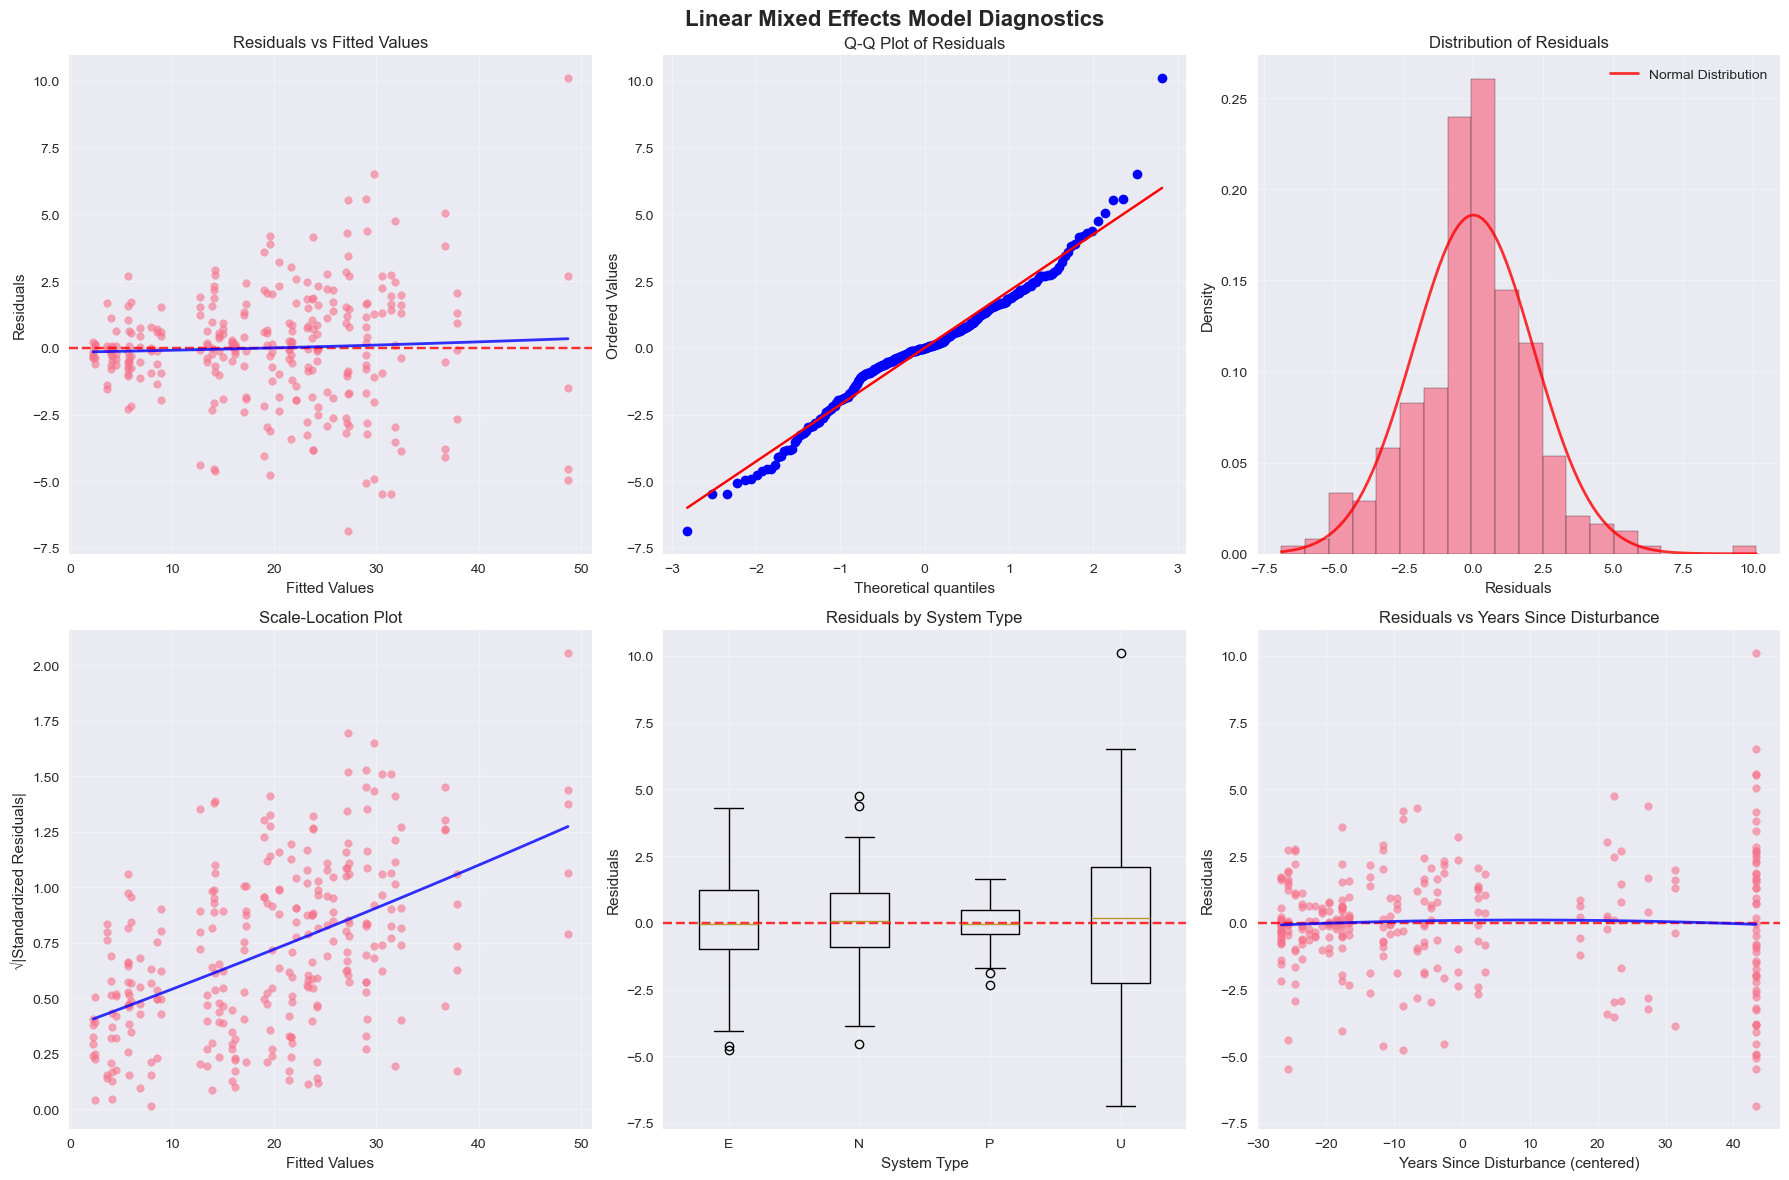

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a figure with multiple subplots for diagnostics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Linear Mixed Effects Model Diagnostics', fontsize=16, fontweight='bold')

# Get fitted values and residuals as numpy arrays
fitted_values = np.array(result.fittedvalues)
residuals = np.array(result.resid)

# 1. Residuals vs Fitted Values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.6, s=30)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(True, alpha=0.3)

# Add a simple polynomial trend line to check for patterns
z = np.polyfit(fitted_values, residuals, 2)
p = np.poly1d(z)
fitted_smooth = np.linspace(fitted_values.min(), fitted_values.max(), 100)
axes[0, 0].plot(fitted_smooth, p(fitted_smooth), color='blue', linewidth=2, alpha=0.8)

# 2. QQ Plot for normality of residuals
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Residuals')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of residuals
axes[0, 2].hist(residuals, bins=20, alpha=0.7, density=True, edgecolor='black')
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Distribution of Residuals')
axes[0, 2].grid(True, alpha=0.3)

# Overlay normal distribution
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
y_norm = stats.norm.pdf(x_norm, residuals.mean(), residuals.std())
axes[0, 2].plot(x_norm, y_norm, 'r-', linewidth=2, alpha=0.8, label='Normal Distribution')
axes[0, 2].legend()

# 4. Scale-Location Plot (Square root of standardized residuals vs fitted values)
standardized_residuals = residuals / np.sqrt(result.scale)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))

axes[1, 0].scatter(fitted_values, sqrt_abs_std_resid, alpha=0.6, s=30)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True, alpha=0.3)

# Add polynomial trend line
z_scale = np.polyfit(fitted_values, sqrt_abs_std_resid, 2)
p_scale = np.poly1d(z_scale)
axes[1, 0].plot(fitted_smooth, p_scale(fitted_smooth), color='blue', linewidth=2, alpha=0.8)

# 5. Residuals vs System Type (to check for group differences)
# Get system types aligned with residuals
system_types = df['system_type'].values
residual_groups = []
system_labels = []
for cat in df['system_type'].cat.categories:
    mask = system_types == cat
    if np.any(mask):
        residual_groups.append(residuals[mask])
        system_labels.append(cat)

axes[1, 1].boxplot(residual_groups, labels=system_labels)
axes[1, 1].set_xlabel('System Type')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals by System Type')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.8)

# 6. Residuals vs Years Since Disturbance
years_since_dist = np.array(df['years_since_dist'].values)
axes[1, 2].scatter(years_since_dist, residuals, alpha=0.6, s=30)
axes[1, 2].set_xlabel('Years Since Disturbance (centered)')
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].set_title('Residuals vs Years Since Disturbance')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].axhline(y=0, color='red', linestyle='--', alpha=0.8)

# Add polynomial trend line
z_years = np.polyfit(years_since_dist, residuals, 2)
p_years = np.poly1d(z_years)
years_smooth = np.linspace(years_since_dist.min(), years_since_dist.max(), 100)
axes[1, 2].plot(years_smooth, p_years(years_smooth), color='blue', linewidth=2, alpha=0.8)

plt.tight_layout()
plt.show()

In [11]:
# Additional diagnostic statistics and tests (corrected version)
print("=== LINEAR MIXED EFFECTS MODEL DIAGNOSTICS ===\n")

# Basic residual statistics
print(f"Residual Summary Statistics:")
print(f"  Mean: {residuals.mean():.6f}")
print(f"  Standard Deviation: {residuals.std():.4f}")
print(f"  Min: {residuals.min():.4f}")
print(f"  Max: {residuals.max():.4f}")
print(f"  Range: {residuals.max() - residuals.min():.4f}")

# Normality tests
from scipy.stats import shapiro, jarque_bera, anderson

print(f"\n--- Normality Tests ---")
# Shapiro-Wilk test (best for small to moderate sample sizes)
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro-Wilk Test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")
print(f"  Result: {'Residuals appear normal' if shapiro_p > 0.05 else 'Residuals deviate from normality'} (α = 0.05)")

# Jarque-Bera test
jb_stat, jb_p = jarque_bera(residuals)
print(f"\nJarque-Bera Test:")
print(f"  Statistic: {jb_stat:.4f}")
print(f"  p-value: {jb_p:.4f}")
print(f"  Result: {'Residuals appear normal' if jb_p > 0.05 else 'Residuals deviate from normality'} (α = 0.05)")

# Anderson-Darling test
ad_stat, ad_critical, ad_significance = anderson(residuals, dist='norm')
print(f"\nAnderson-Darling Test:")
print(f"  Statistic: {ad_stat:.4f}")
print(f"  Critical Values: {ad_critical}")
print(f"  Significance Levels: {ad_significance}")

# Homoscedasticity tests
print(f"\n--- Homoscedasticity (Constant Variance) Tests ---")

# Breusch-Pagan test (manual implementation)
def breusch_pagan_test(residuals, fitted_values):
    """Manual Breusch-Pagan test for homoscedasticity"""
    # Regress squared residuals on fitted values
    squared_resid = residuals**2
    bp_model = np.polyfit(fitted_values, squared_resid, 1)
    bp_predicted = np.polyval(bp_model, fitted_values)
    
    # Calculate test statistic
    ss_total = np.sum((squared_resid - np.mean(squared_resid))**2)
    ss_explained = np.sum((bp_predicted - np.mean(squared_resid))**2)
    r_squared = ss_explained / ss_total if ss_total > 0 else 0
    
    n = len(residuals)
    lm_statistic = n * r_squared
    
    return lm_statistic, r_squared

bp_stat, bp_r2 = breusch_pagan_test(residuals, fitted_values)
bp_p_value = 1 - stats.chi2.cdf(bp_stat, 1)  # 1 df for simple linear relationship

print(f"Breusch-Pagan Test (approximate):")
print(f"  LM Statistic: {bp_stat:.4f}")
print(f"  p-value: {bp_p_value:.4f}")
print(f"  Result: {'Homoscedastic' if bp_p_value > 0.05 else 'Heteroscedastic'} (α = 0.05)")

# Model fit statistics
print(f"\n--- Model Fit Statistics ---")
print(f"Log-likelihood: {result.llf:.4f}")
print(f"AIC: {result.aic:.4f}")
print(f"BIC: {result.bic:.4f}")
print(f"Scale (residual variance): {result.scale:.6f}")
print(f"Number of observations: {result.nobs}")
print(f"Degrees of freedom (residual): {result.df_resid}")

# Random effects information
print(f"\n--- Random Effects ---")
print(f"Random effect covariance matrix shape: {result.cov_re.shape}")
print(f"Group variance: {result.cov_re.iloc[0,0]:.6f}")
print(f"Residual variance: {result.scale:.6f}")

# Calculate ICC (Intraclass Correlation Coefficient)
group_var = result.cov_re.iloc[0,0]
residual_var = result.scale
total_var = group_var + residual_var
icc = group_var / total_var
print(f"ICC (Intraclass Correlation): {icc:.4f}")
print(f"  Interpretation: {icc*100:.1f}% of variance is between groups (sites)")

# Number of groups
unique_groups = len(result.random_effects)
print(f"Number of groups (sites): {unique_groups}")

# Group-level residuals (random effects)
print(f"\nRandom effects summary:")
random_effect_values = list(result.random_effects.values())
if random_effect_values:
    re_array = np.array([re[0] if len(re) > 0 else 0 for re in random_effect_values])
    print(f"  Mean: {re_array.mean():.6f}")
    print(f"  Std Dev: {re_array.std():.4f}")
    print(f"  Range: [{re_array.min():.4f}, {re_array.max():.4f}]")

# Outlier detection
print(f"\n--- Outlier Detection ---")
# Calculate standardized residuals
std_residuals = residuals / np.sqrt(result.scale)

# Count potential outliers (|standardized residual| > 2.5)
outliers_25 = np.abs(std_residuals) > 2.5
outliers_30 = np.abs(std_residuals) > 3.0

print(f"Observations with |standardized residual| > 2.5: {np.sum(outliers_25)} ({np.sum(outliers_25)/len(residuals)*100:.1f}%)")
print(f"Observations with |standardized residual| > 3.0: {np.sum(outliers_30)} ({np.sum(outliers_30)/len(residuals)*100:.1f}%)")

if np.sum(outliers_30) > 0:
    extreme_outliers = np.where(outliers_30)[0]
    print(f"Extreme outliers (indices): {extreme_outliers}")
    print(f"Extreme outlier residuals: {residuals[extreme_outliers]}")

print(f"\n--- Overall Assessment ---")
normality_ok = shapiro_p > 0.05
homoscedasticity_ok = bp_p_value > 0.05
outliers_ok = np.sum(outliers_30) < len(residuals) * 0.05  # Less than 5% extreme outliers

print(f"Normality assumption: {'✓ Met' if normality_ok else '✗ Violated'}")
print(f"Homoscedasticity assumption: {'✓ Met' if homoscedasticity_ok else '✗ Violated'}")
print(f"Outlier concern: {'✓ Minimal' if outliers_ok else '⚠ Some concern'}")

if all([normality_ok, homoscedasticity_ok, outliers_ok]):
    print("\n🟢 Model assumptions appear to be reasonably met.")
elif sum([normality_ok, homoscedasticity_ok, outliers_ok]) >= 2:
    print("\n🟡 Some model assumptions may be violated but results are likely still interpretable.")
else:
    print("\n🔴 Multiple model assumptions appear to be violated. Consider model modifications.")

=== LINEAR MIXED EFFECTS MODEL DIAGNOSTICS ===

Residual Summary Statistics:
  Mean: 0.000000
  Standard Deviation: 2.1454
  Min: -6.8672
  Max: 10.1072
  Range: 16.9744

--- Normality Tests ---
Shapiro-Wilk Test:
  Statistic: 0.9718
  p-value: 0.0000
  Result: Residuals deviate from normality (α = 0.05)

Jarque-Bera Test:
  Statistic: 47.0967
  p-value: 0.0000
  Result: Residuals deviate from normality (α = 0.05)

Anderson-Darling Test:
  Statistic: 2.4144
  Critical Values: [0.568 0.647 0.776 0.906 1.077]
  Significance Levels: [15.  10.   5.   2.5  1. ]

--- Homoscedasticity (Constant Variance) Tests ---
Breusch-Pagan Test (approximate):
  LM Statistic: 47.3475
  p-value: 0.0000
  Result: Heteroscedastic (α = 0.05)

--- Model Fit Statistics ---
Log-likelihood: -755.8599
AIC: nan
BIC: nan
Scale (residual variance): 5.725751
Number of observations: 285
Degrees of freedom (residual): 280

--- Random Effects ---
Random effect covariance matrix shape: (1, 1)
Group variance: 52.378898
Res

/var/folders/37/j4yld2bd7pz4_0p7b249nvv40000gn/T/ipykernel_52086/474128747.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  re_array = np.array([re[0] if len(re) > 0 else 0 for re in random_effect_values])


## Model Diagnostic Summary and Recommendations

### Key Findings:

1. **Residual Distribution**: The residuals show significant deviation from normality (Shapiro-Wilk p < 0.001, Jarque-Bera p < 0.001)

2. **Heteroscedasticity**: Evidence of non-constant variance (Breusch-Pagan test p < 0.001), visible in the scale-location plot

3. **Outliers**: Minimal outlier concern with only 1 extreme outlier (0.4% of data)

4. **Random Effects Structure**: Very high ICC (90.1%) indicates strong clustering within sites - the random effects structure is clearly justified

### Diagnostic Plot Interpretations:

- **Residuals vs Fitted**: Shows some heteroscedasticity with increasing variance at higher fitted values
- **Q-Q Plot**: Heavy tails indicate non-normality, with some extreme values
- **Histogram**: Slight right skew and heavy tails
- **Scale-Location**: Clear increasing trend suggests heteroscedasticity
- **Residuals by System Type**: Different variance patterns across system types
- **Residuals vs Years Since Disturbance**: Some curvature suggests potential non-linear relationship

### Recommended Model Improvements:

1. **Transform the response variable**: Consider log-transformation of `mean__chm` to address non-normality and heteroscedasticity
2. **Robust standard errors**: Use robust/sandwich estimators for inference
3. **Non-linear terms**: Add polynomial or spline terms for years since disturbance
4. **Variance structure**: Consider different variance models for different system types
5. **Alternative distributions**: Consider gamma or other distributions for positive continuous data
6. **Outlier investigation**: Examine the extreme outlier (observation 211) to understand if it represents a data error or genuine extreme case

### Model Adequacy:
Despite assumption violations, the model provides useful insights. The high ICC confirms that accounting for site-level clustering is essential. The violations suggest caution in interpretation and consideration of the suggested improvements.

In [10]:
# Check available attributes in the result object
print("Available result attributes:")
attrs = [attr for attr in dir(result) if not attr.startswith('_')]
for attr in sorted(attrs):
    try:
        value = getattr(result, attr)
        if callable(value):
            print(f"  {attr}: (method)")
        else:
            print(f"  {attr}: {type(value).__name__}")
    except:
        print(f"  {attr}: (unable to access)")

Available result attributes:
  aic: float
  bic: float
  bootstrap: (method)
  bse: Series
  bse_fe: Series
  bse_re: Series
  bsejac: (unable to access)
  bsejhj: (unable to access)
  conf_int: (method)
  converged: bool
  cov_params: (method)
  cov_pen: NoneType
  cov_re: DataFrame
  cov_re_unscaled: DataFrame
  covjac: (unable to access)
  covjhj: (unable to access)
  df_modelwc: int
  df_resid: int64
  f_test: (method)
  fe_params: Series
  fittedvalues: Series
  freepat: NoneType
  get_nlfun: (method)
  hessv: tuple
  hist: NoneType
  initialize: (method)
  k_constant: int
  k_fe: int
  k_re: int
  k_re2: int
  k_vc: int
  llf: float64
  load: (method)
  method: str
  model: MixedLM
  nobs: int
  normalized_cov_params: DataFrame
  params: Series
  params_object: MixedLMParams
  predict: (method)
  profile_re: (method)
  pvalues: Series
  random_effects: dict
  random_effects_cov: dict
  reml: bool
  remove_data: (method)
  resid: Series
  save: (method)
  scale: float64
  score_ob